<a href="https://colab.research.google.com/github/juharrais/Projeto_predicao_carro/blob/main/estatistica_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive') # needs to authenticate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the data from csv file from drive
car_dataset = pd.read_csv('/content/drive/MyDrive/Projeto/cars_train.csv',
                          encoding='utf-16',
                          sep='\t')

In [ ]:
print(car_dataset.preco.mean())
print(car_dataset.preco.median())
print(car_dataset.preco.max())
print(car_dataset.preco.min())

133023.87988039522
114355.79699828094
1359812.8923094273
9869.950645135155


In [ ]:
valor_max = car_dataset.preco.max()
print(valor_max)

1359812.8923094273


In [ ]:
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

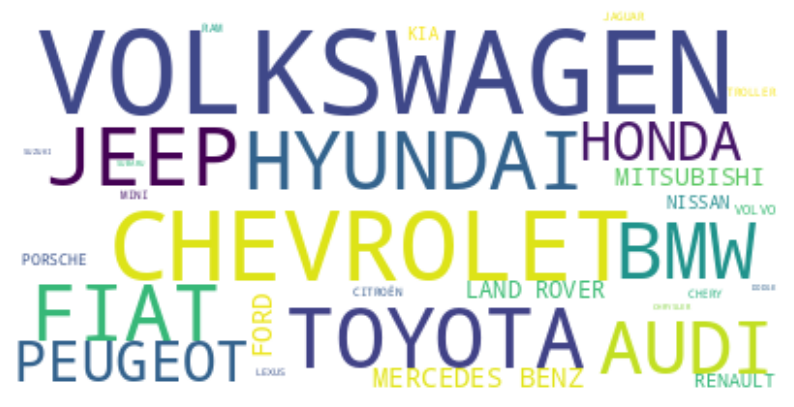

In [ ]:
from wordcloud import \text, STOPWORDS

text_list = list(car_dataset.marca)
text = '-'.join(text_list)
#generate wordcloud
wordcloud = WordCloud(background_color='white').generate(text)
#plot wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

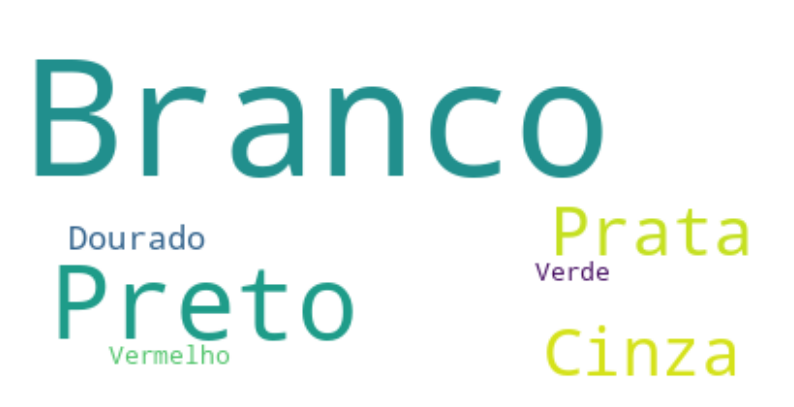

In [ ]:
text_list = list(car_dataset.cor)
text = '-'.join(text_list)
#generate wordcloud
wordcloud = WordCloud(background_color='white').generate(text)
#plot wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<ipython-input-34-f587cfd40a5a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x).set_title('Frequência de distribuição dos preços')


Text(0.5, 1.0, 'Frequência de distribuição dos preços')

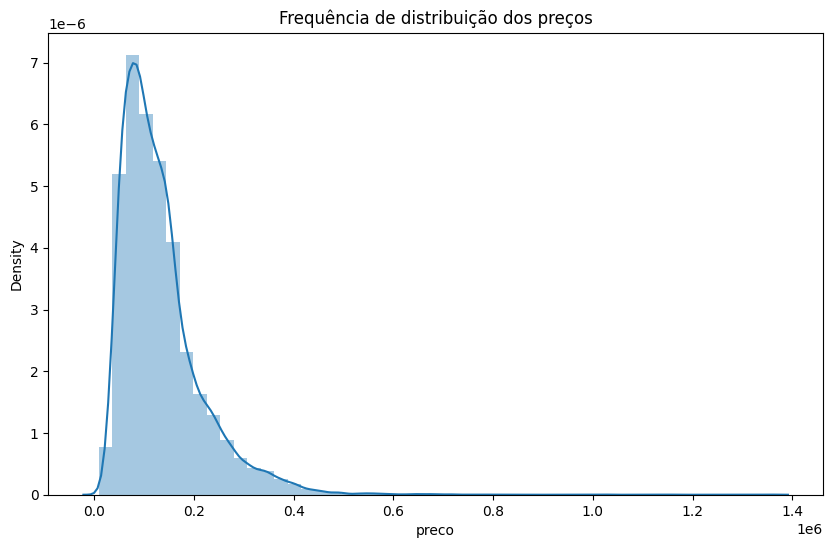

In [ ]:
#grafico da distribuicao
x = car_dataset.preco
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequência de distribuição dos preços')

Text(0.5, 1.0, 'Km vs Preço')

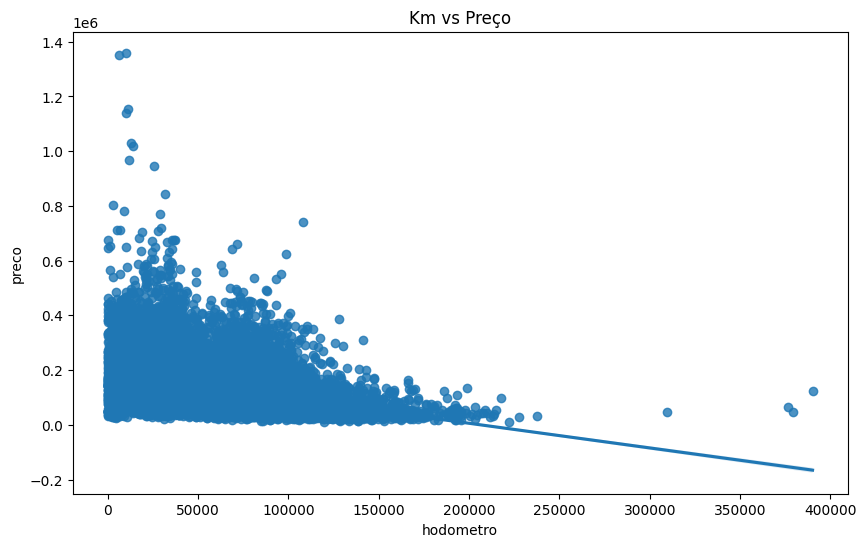

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='hodometro', y='preco', data=car_dataset).set_title('Km vs Preço')

ê-se claramente que à medida que o km sobe, o preço desce. No entanto, existem outliers. De acordo com o gráfico de regressão acima, carros com km acima de 400.000 podem ser marcados como discrepantes. Eu removi esses outliers para aumentar a precisão do modelo. Outliers tendem a tornar o modelo overfitting.

Text(0.5, 1.0, 'Ano vs Preço')

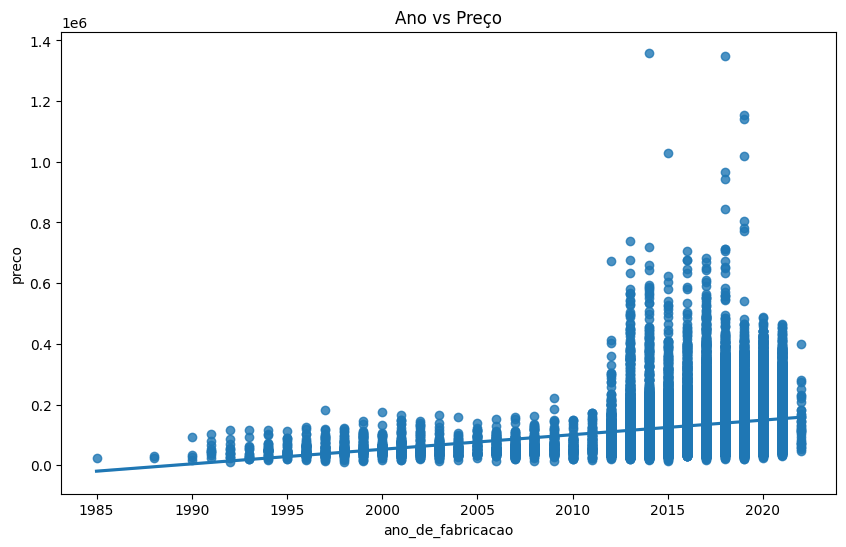

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='ano_de_fabricacao', y='preco', data=car_dataset).set_title('Ano vs Preço')

<ipython-input-9-e8fbf0a15ef2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = car_dataset.corr()


<Axes: >

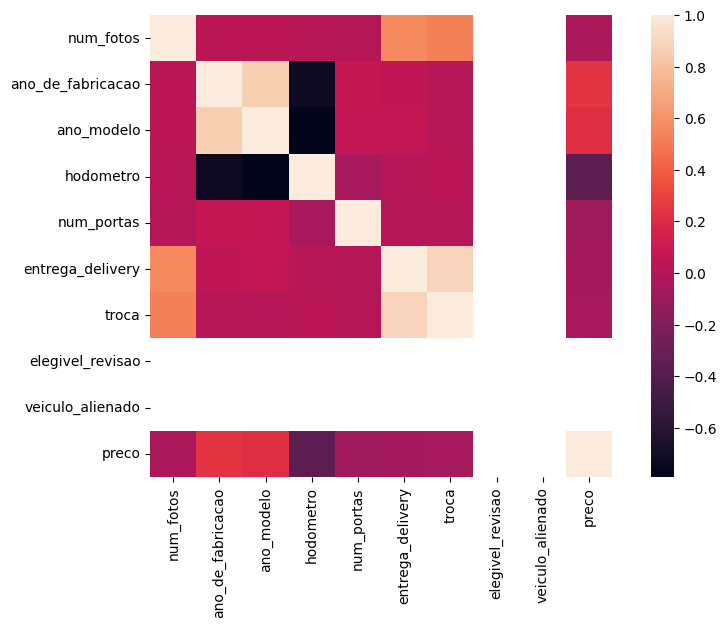

In [ ]:
corr = car_dataset.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, vmax=1, square=True)

In [ ]:
#Plotagem do grafico
marca_filtrado = car_dataset['marca']
df_plot = pd.DataFrame(marca_filtrado.value_counts())
df_plot.head()

,marca
VOLKSWAGEN,4594
CHEVROLET,3020
TOYOTA,2180
HYUNDAI,2043
JEEP,2000


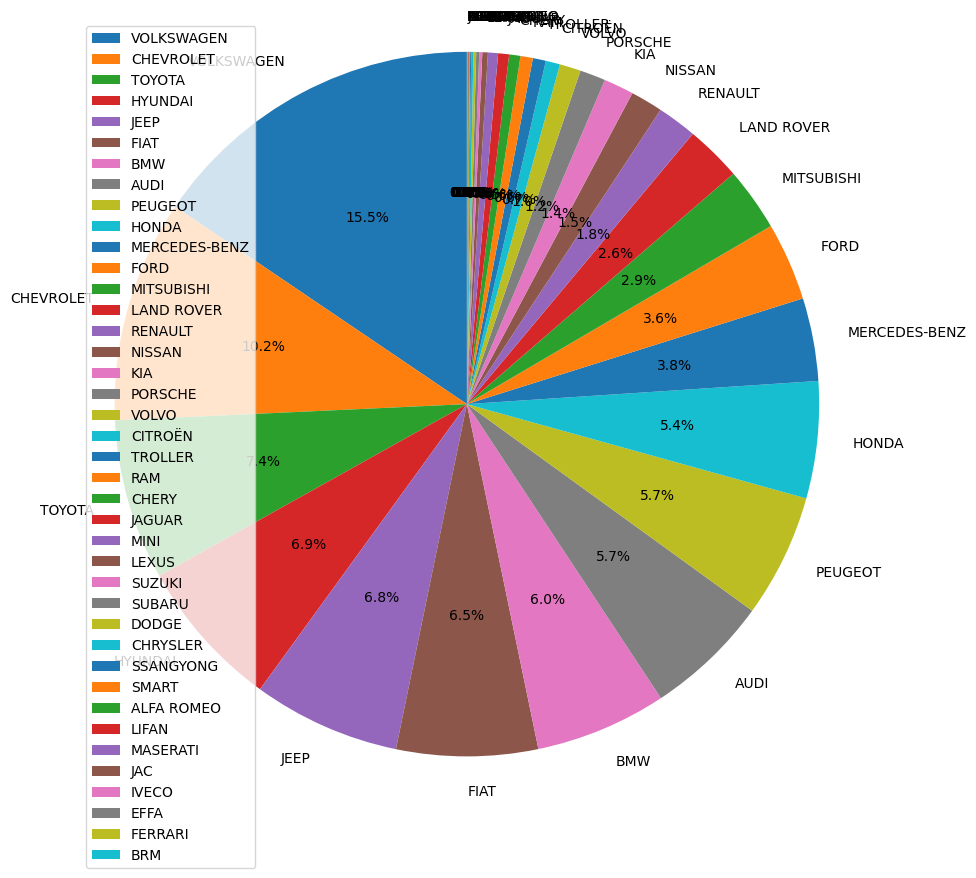

In [ ]:
plt.rcParams['figure.figsize'] = [10,10]
plt.pie(df_plot['marca'], labels=df_plot.index, shadow = False, startangle = 90, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend()
plt.savefig('marcas.png', format = 'png')

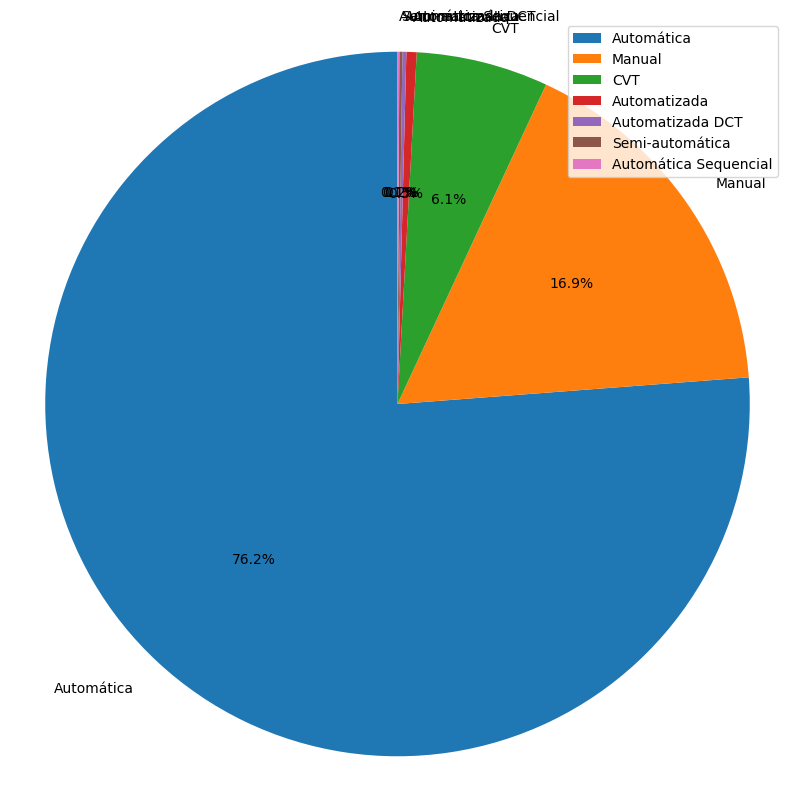

In [ ]:
#Plotagem do grafico
cambio_filtrado = car_dataset['cambio']
df_plot = pd.DataFrame(cambio_filtrado.value_counts())
plt.rcParams['figure.figsize'] = [10,10]
plt.pie(df_plot['cambio'], labels=df_plot.index, shadow = False, startangle = 90, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend()
plt.savefig('cambio.png', format = 'png')

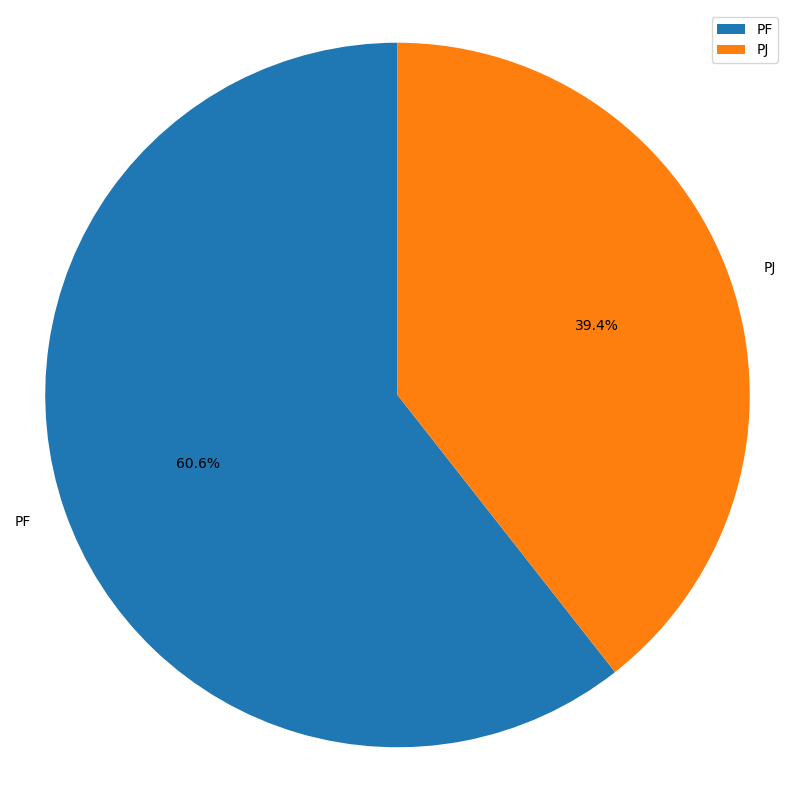

In [ ]:
#Plotagem do grafico
vendedor = car_dataset['tipo_vendedor']
df_plot = pd.DataFrame(vendedor.value_counts())
plt.rcParams['figure.figsize'] = [10,10]
plt.pie(df_plot['tipo_vendedor'], labels=df_plot.index, shadow = False, startangle = 90, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend()